In [72]:
import numpy as np
from time import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

X = np.load('../data/X.npy')
y = np.load('../data/y.npy')
print X.shape
print y.shape

(2013, 77)
(2013,)


In [31]:
kmeans = KMeans(n_clusters=512,
                n_init=10, 
                n_jobs=-1).fit(X)

dists = kmeans.transform(X)

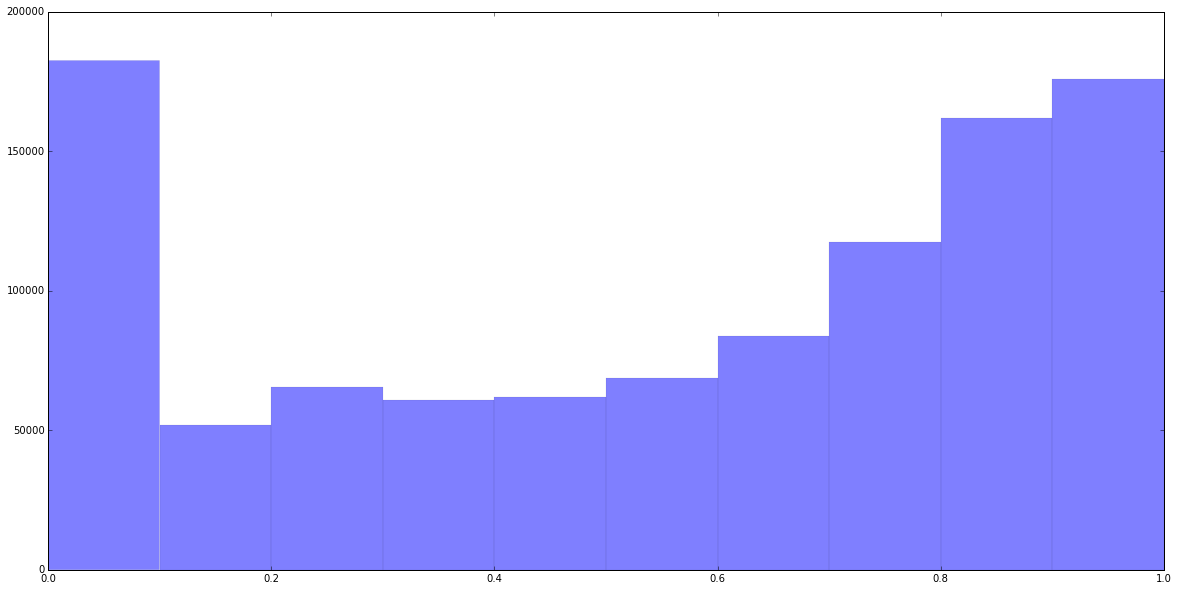

In [38]:
gamma = 0.0004
rbf = lambda x: np.exp(-gamma * x)

rbf_dists = rbf(dists)
plt.figure(figsize=(20,10))
plt.hist(rbf_dists.flatten(), lw=0.1, alpha=0.5);

In [82]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, make_union
from itertools import chain

clf = ExtraTreesClassifier(bootstrap=True, 
                           min_samples_leaf=13,
                           n_estimators=400,
                           min_samples_split=8,
                           criterion='gini',
                           max_features=388,
                           max_depth=None,
                           n_jobs=-1,
                          )


# clf = LinearSVC()

pipe = make_pipeline(clf)

k = 4


scores_rep = []
for ii in range(5):
    skf = StratifiedKFold(y, n_folds=k, random_state=np.random.random_integers(0,100))
    print ii,
    scores = cross_val_score(
        estimator=pipe, 
        X=np.c_[X, rbf_dists], y=y, 
        scoring='roc_auc',
        cv=skf, 
        n_jobs=-1)
    scores_rep.append(scores)
scores_all = np.array(list(chain(*scores_rep)))

0 1 2 3 4


In [83]:
print scores_all
print scores_all.mean()
print scores_all.std()

[ 0.9363534   0.89789186  0.89884696  0.92805031  0.93627293  0.89773093
  0.89900822  0.92821803  0.93619247  0.89773093  0.89900822  0.92821803
  0.93611201  0.89757     0.89876633  0.92838574  0.93611201  0.89805278
  0.89892759  0.92838574]
0.915291725117
0.0171753439565


In [73]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {
    "n_estimators": sp_randint(10, 800),
    "max_depth": [3, 5, 10, 50, None],
    "max_features": sp_randint(1, rbf_dists.shape[1]),
    "min_samples_split": sp_randint(1, 15),
    "min_samples_leaf": sp_randint(1, 15),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]}


n_iter_search = 500
random_search = RandomizedSearchCV(
    estimator=ExtraTreesClassifier(), 
    param_distributions=param_dist,
    scoring='roc_auc',
    cv=skf,
    n_iter=n_iter_search,
    n_jobs=-1)

tic = time()
random_search.fit(rbf_dists, y)
toc = time() - tic
print toc

4135.65506291


In [77]:
random_search.grid_scores_

[mean: 0.89817, std: 0.02395, params: {'bootstrap': True, 'min_samples_leaf': 3, 'n_estimators': 610, 'min_samples_split': 5, 'criterion': 'gini', 'max_features': 410, 'max_depth': 5},
 mean: 0.89035, std: 0.02145, params: {'bootstrap': False, 'min_samples_leaf': 12, 'n_estimators': 203, 'min_samples_split': 11, 'criterion': 'gini', 'max_features': 210, 'max_depth': None},
 mean: 0.89032, std: 0.01551, params: {'bootstrap': False, 'min_samples_leaf': 9, 'n_estimators': 197, 'min_samples_split': 9, 'criterion': 'entropy', 'max_features': 132, 'max_depth': None},
 mean: 0.89131, std: 0.02192, params: {'bootstrap': True, 'min_samples_leaf': 3, 'n_estimators': 258, 'min_samples_split': 4, 'criterion': 'entropy', 'max_features': 234, 'max_depth': 3},
 mean: 0.88957, std: 0.02169, params: {'bootstrap': False, 'min_samples_leaf': 9, 'n_estimators': 534, 'min_samples_split': 7, 'criterion': 'gini', 'max_features': 166, 'max_depth': 3},
 mean: 0.89864, std: 0.01924, params: {'bootstrap': False,